In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# <font color="SteelBlue">Naive Bayes Classifier

In [3]:
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [5]:
encoder = LabelEncoder()

encoded_weather = encoder.fit_transform(weather)
encoded_temp = encoder.fit_transform(temp)
encoded_label = encoder.fit_transform(play)

print(encoded_weather)
print(encoded_temp)
print(encoded_label)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]
[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [6]:
features = list(zip(encoded_weather, encoded_temp))
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [8]:
model = GaussianNB()
model.fit(features, encoded_label)
sample_prediction = model.predict([[0, 2], [1, 1]])
print("prediction:", sample_prediction)

prediction = model.predict(features)
print(classification_report(encoded_label, prediction))

prediction: [1 1]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.78      0.78      0.78         9

    accuracy                           0.71        14
   macro avg       0.69      0.69      0.69        14
weighted avg       0.71      0.71      0.71        14



# <font color="steelblue">Naive Bayes with Multiple Labels

In [9]:
from sklearn.datasets import load_wine
wine = load_wine()

In [10]:
print("Features:", wine.feature_names)
print("Labels:", wine.target_names)

Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels: ['class_0' 'class_1' 'class_2']


In [11]:
wine.data.shape

(178, 13)

In [12]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=109)

In [71]:
def train_model(x, y, model, test_size=.3):
    x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=test_size, random_state=109
    )
    print(f"Training with: {x_train.shape}.. Validating with: {x_test.shape}")
    print(f"Done training {model.__class__.__name__} in {end-start: .3f}s")
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    print("Training performance")
    print(classification_report(y_train, train_pred))
    print("Testing performance")
    print(classification_report(y_test, test_pred))

In [72]:
model = GaussianNB()
train_model(wine.data, wine.target, GaussianNB, test_size=.3)

Training with: (124, 13).. Validating with: (54, 13)
Done training ABCMeta in  0.002s


TypeError: fit() missing 1 required positional argument: 'y'

In [70]:
gnb = GaussianNB()

from time import time 
start = time()
gnb.fit(x_train, y_train)
end = time()
print(f"Done training {model.__class__.__name__} in {end-start: .3f}s")

gnb.fit(x_train, y_train)

train_pred = gnb.predict(x_train)
test_pred = gnb.predict(x_test)

Done training GaussianNB in  0.002s


In [19]:
print("Training performance")
print(classification_report(y_train, train_pred))

print("Testing performance")
print(classification_report(y_test, test_pred))

Training performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      0.98      0.99        52
           2       0.97      1.00      0.99        34

    accuracy                           0.99       124
   macro avg       0.99      0.99      0.99       124
weighted avg       0.99      0.99      0.99       124

Testing performance
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.94      0.79      0.86        19
           2       0.88      1.00      0.93        14

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54



# <font color="SteelBlue">Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
diabetes = pd.read_csv("data/diabetes.csv")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [41]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [42]:
feat_cols = ["Pregnancies", "Glucose", "BloodPressure", "Insulin", "BMI", "DiabetesPedigreeFunction", 'Age']
x = diabetes[feat_cols]
y = diabetes.Outcome

In [67]:
model = DecisionTreeClassifier(random_state=11)
train_model(x, y, DecisionTreeClassifier, test_size=.3)

Training with: (537, 7).. Validating with: (231, 7)
Done training ABCMeta in  0.002s


TypeError: fit() missing 1 required positional argument: 'y'

In [49]:
!conda install python-graphviz -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/septyaprilliandary/opt/anaconda3/envs/hacktiv8-env

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.14.12              |       hc4e6be7_4         860 KB
    cffi-1.14.0                |   py38hb5b8e2f_0         216 KB
    fontconfig-2.13.0          |       h5d5b041_1         202 KB
    fribidi-1.0.10             |       haf1e3a3_0          63 KB
    glib-2.63.1                |       hd977a24_0         2.6 MB
    graphite2-1.3.14           |       h38d11af_0          80 KB
    graphviz-2.40.1            |       hefbbd9a_2         6.3 MB
    harfbuzz-1.8.8           

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=109)

In [74]:
model = DecisionTreeClassifier(random_state=11)

In [75]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [76]:
print("Accuracty:", metrics.accuracy_score(y_test, y_pred))

Accuracty: 0.696969696969697


In [78]:
import pydotplus
from six import StringIO
from IPython.display import Image
import sklearn.tree as tree

In [82]:
dot_data = StringIO()
tree.export_graphviz(model,out_file=dot_data,class_names=["0","1"],
                    feature_names=feat_cols,filled=True,rounded=True,
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


InvocationException: Program terminated with status: -9. stderr follows: []

In [85]:
def visualize_tree (model, class_names):
    dot_data = StringIO()
    tree.export_graphviz(model, class_names=class_names, out_file=dot_data,
                        feature_names=feat_cols, filled=True, rounded=True,
                        special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

In [86]:
graph = visualize_tree(model, ["0", "1"])
Image(graph)

InvocationException: Program terminated with status: -9. stderr follows: []

# <font color="steelblue">Random Forest

In [87]:
from sklearn.datasets import load_iris
iris = load_iris()

In [88]:
df_iris = pd.DataFrame({
    "sepal_length": iris.data[:, 0],
    "sepal_width": iris.data[:, 1],
    "petal_length": iris.data[:, 2],
    "petal_width": iris.data[:, 3],
    "species": iris.target
})

df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [91]:
x = df_iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = df_iris["species"]

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=109)

In [89]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

In [93]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [94]:
y_pred = model.predict(x_test)

In [95]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


In [97]:
model.predict([[3, 5, 4, 2]])

array([1])

In [99]:
iris_feat_importance = pd.Series(model.feature_importances_, index=iris.feature_names)
iris_feat_importance

sepal length (cm)    0.100707
sepal width (cm)     0.019645
petal length (cm)    0.520449
petal width (cm)     0.359199
dtype: float64

No handles with labels found to put in legend.


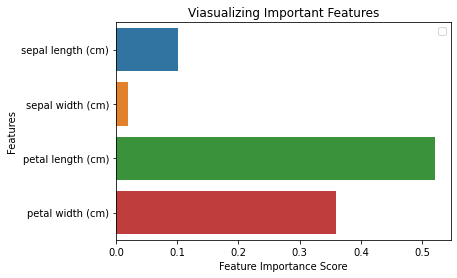

In [101]:
import seaborn as sns
%matplotlib inline

sns.barplot(x=iris_feat_importance, y=iris_feat_importance.index)

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Viasualizing Important Features")
plt.legend()
plt.show()

# <font color="steelblue"> Support Vector Machines

In [102]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [104]:
print("Features:", cancer.feature_names)
print("Labels:", cancer.target_names)

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels: ['malignant' 'benign']


In [105]:
from sklearn import svm

In [ ]:
model = SVC(kernel="linear")
train_model()

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# <font color="steelblue"> Compare

In [107]:
train = pd.read_csv("data/train.csv")
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
